In [2]:
# Загрузка файлов
from modelarts.session import Session
def cifar10_dowloader():
    session = Session()
    bucket_path="/cv-course-public/coding-1/cifar-10-python.tar.gz"
    session.download_data(bucket_path=bucket_path, path="./data/cifar-10-python.tar.gz")
cifar10_dowloader()

Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz


In [3]:
!source activate /home/ma-user/anaconda3/envs/Pytorch-1.0.0
# !pip install --upgrade torch torchvision
!pip install skorch
!pip install torch==1.2.0 torchvision==0.2.0

    100% |████████████████████████████████| 112kB 94.4MB/s ta 0:00:01
    100% |████████████████████████████████| 26.1MB 102.2MB/s ta 0:00:01.0MB 85.1MB/s eta 0:00:01                   | 6.6MB 93.6MB/s eta 0:00:01           | 11.3MB 97.6MB/s eta 0:00:01�            | 15.7MB 96.0MB/s eta 0:00:01��██████████████████       | 20.3MB 86.3MB/s eta 0:00:01�███▊ | 25.0MB 103.9MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 67.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/4e/60/e1/b691ba26947c80f1f329b60c708fa2ba0b25652d5457d5e676
Successfully built tabulate
  Found existing installation: scipy 1.0.0
    Uninstalling scipy-1.0.0:
      Successfully uninstalled scipy-1.0.0
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


    73% |██████�

    74% |█████████████████

    74% |██████�

    74% |█████�

    75% |████████████████�

    75% |████████████████████████▏       | 566.7MB 83.1MB/s eta 0:00:03

    76% |████████████████████████▍       | 569.5MB 93.3MB/s eta 0:00:0

    76% |████████████████████████▌       | 572.5MB 95.1MB/s eta 0:00:02

    76% |████████████████████████▋       | 575.6MB 92.2MB/s eta 0:00:02

    77% |████████████████████████▊       | 578.7MB 99.2MB/s eta 0:00:02

    77% |████████████████████████▉       | 581.7MB 91.9MB/s eta 0:00:02

    78% |█████████████████████████       | 584.3MB 89.4MB/s eta 0:00:02

    78% |█████████████████████████       | 587.0MB 94.5MB/s eta 0:00:02

    78% |████████████████

    79% |█████████████████████████▎    

    79% |█████████████████████████▍    

    79% |█████████████████████████▋    

    80% |███████████████████�

    80% |███████████████�

    80% |████████████████�

    81% |██████████████████████████      | 609.7MB 92.2MB/s eta 0:00:02

    82% |█████████████████

    83% |██████████████████�

    83% |██████████████████�

    84% |███████████████████████████     | 631.7MB 96.9MB/s eta 0:00:

    84% |███████�

    85% |███████████████████

    85% |██████████████████�

    86% |███████�

    86% |███████████████████████████▋    | 64

    86% |███████████████████████████▉    | 650.6MB 91.8MB/s eta 0:00:02

    87% |███████�

    87% |███████�

    88

    88

    88% |�

    89% |████████████████████████████▌   | 667.5MB 97.9MB/s eta 0:00:01

    89% |�

    90

    90% |████

    91% |████████████�

    91% |█████████████████████████████▎  | 684

    91% |█████████████████████████████▍  | 686

    92% |█████████████████████████████▌  | 689

    92% |████████████████████████

    92% |█████████████████████████████▊  | 694.3MB 95.1MB/s eta 0:00:01

    93% |███████████████�

    93% |██████████████████████████████  | 700

    93% |██████████████████████████████  | 702

    94% |███████████████████████

    94% |███████████████████████

    94% |██████████████████████████████▎ | 709.0MB 89.6MB/s eta 0:00:01

    94% |██████████████████████████████▍ | 711.0MB 57.3MB/s eta 0:00:01

    95% |███████████████████████

    95% |██████████████████████████████▋ | 

    95% |████�

    96% |██████████████████████████████▉ |

    96% |███████████████████████████████ | 722.9MB 101.8MB/s eta 0:00:01

    96% |████�

    97% |███

    97% |█████████████�

    97% |█████████�

    98% |███████████████████████████████�

    98% |█████████████�

    98% |██████████████████████████████

    99% |████████████████████�

    99% |███████████████████████████████▉| 745.2MB 96.0MB/s eta 0:00:01

    99% |█████████████�

    100% |████████████████████████████████| 748.9MB 88.3MB/s 


    100% |████████████████████████████████| 51kB 67.8MB/s ta 0:00:01
  Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0
  Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled torchvision-0.2.1
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import numpy as np
import torch
import torchvision
from models.resnet import resnet20, resnet32, resnet56, resnet110
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier

In [2]:
import torch.nn as nn
import torch.functional as F
from sklearn.model_selection import train_test_split

In [3]:
train_set = torchvision.datasets.cifar.CIFAR10('data/', train=True, download=True)

Files already downloaded and verified


In [4]:
model = resnet20()

In [5]:
X = (np.swapaxes(train_set.train_data, 1, 3)/255).astype('float32')
y = np.array(train_set.train_labels).astype('int64')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.01)

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
model.forward(torch.Tensor(X_train[:4])).argmax(axis=1)

tensor([3, 3, 3, 3])

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [9]:
net = NeuralNetClassifier(
    module=resnet20,
    max_epochs=3,
    lr=0.01,
    optimizer=torch.optim.SGD,
    optimizer__momentum=0.95,
    device=device
)

In [10]:
net.fit(X_train, y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.0769           nan  0.1021
      2           nan       0.0769           nan  0.0842
      3           nan       0.0769           nan  0.0823


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=_ResNet(
    (conv1): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (layer1): Sequential(
      (0): _BasicBlock(
        (conv_bn_relu1): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (conv_bn2): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (relu_out): ReLU(inplace=True)
      )
      (1): _BasicBlock(
        (conv_bn_relu1): Sequential(
          (0): Conv2d(

In [11]:
params = {
    'module': [resnet20, resnet56, resnet110],
    'lr': [1e-1, 1e-1*2, 1e-1*5, 1e-1*10, 1e-1/2, 1e-1/5, 1e-1/10],
    'max_epochs': [20, 50, 100]
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='accuracy')

In [ ]:
gs.fit(X, y)

Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following parameters were re-set: momentum.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1000           nan  4.5679
      2           nan       0.1000           nan  4.5126
      3           nan       0.1000           nan  4.5311
      4           nan       0.1000           nan  4.5023
      5           nan       0.1000           nan  4.5221
      6           nan       0.1000           nan  4.5166
      7           nan       0.1000           nan  4.5184
      8           nan       0.1000           nan  4.4798
      9           nan       0.1000           nan  4.4860
     10           nan       0.1000           nan  4.5357
     11           nan       0.1000           nan  4.4790
     12           nan       0.1000           nan  4.4794
     13           nan       0.1000           

     11           nan       0.2033           nan  11.2281
     12           nan       0.2049           nan  11.2404
     13           nan       0.2081           nan  11.2469
     14           nan       0.2075           nan  11.2366
     15           nan       0.2148           nan  11.2372
     16           nan       0.2061           nan  11.2333
     17           nan       0.2159           nan  11.2426
     18           nan       0.2175           nan  11.2192
     19           nan       0.2169           nan  11.2364
     20           nan       0.2133           nan  11.2573
Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following parameters were re-set: momentum.
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.1538           nan  21.3904
      2           nan       0.1525           nan  21.3751
      3           nan       0.1

      2           nan       0.1000           nan  4.4489
      3           nan       0.1000           nan  4.4749
      4           nan       0.1096           nan  4.4480
      5           nan       0.1217           nan  4.4462
      6           nan       0.1576           nan  4.4495
      7           nan       0.1382           nan  4.4462
      8           nan       0.1241           nan  4.4504
      9           nan       0.1460           nan  4.4471
     10           nan       0.1592           nan  4.4465
     11           nan       0.1637           nan  4.5001
     12           nan       0.1636           nan  4.4521
     13           nan       0.1655           nan  4.4446
     14           nan       0.1715           nan  4.4660
     15           nan       0.1766           nan  4.4471
     16           nan       0.1649           nan  4.4788
     17           nan       0.1726           nan  4.4541
     18           nan       0.1543           nan  4.4482
     19           nan       0.1

     30           nan       0.1000           nan  11.2298
     31           nan       0.1000           nan  11.2149
     32           nan       0.1000           nan  11.2359
     33           nan       0.1000           nan  11.2273
     34           nan       0.1000           nan  11.2476
     35           nan       0.1000           nan  11.2247
     36           nan       0.1000           nan  11.2350
     37           nan       0.1000           nan  11.2404
     38           nan       0.1000           nan  11.2183
     39           nan       0.1000           nan  11.2149
     40           nan       0.1000           nan  11.2350
     41           nan       0.1000           nan  11.2362
     42           nan       0.1000           nan  11.2214
     43           nan       0.1000           nan  11.2199
     44           nan       0.1000           nan  11.2159
     45           nan       0.1000           nan  11.2437
     46           nan       0.1000           nan  11.2377
     47       

      4           nan       0.1796           nan  21.3646
      5           nan       0.1732           nan  21.3710
      6           nan       0.1819           nan  21.3913
      7           nan       0.1750           nan  21.3633
      8           nan       0.1804           nan  21.3781
      9           nan       0.1799           nan  21.3765
     10           nan       0.1835           nan  21.3706
     11           nan       0.1838           nan  21.3841
     12           nan       0.1801           nan  21.3679
     13           nan       0.1993           nan  21.3746
     14           nan       0.1960           nan  21.3751
     15           nan       0.1934           nan  21.3916
     16           nan       0.1942           nan  21.3643
     17           nan       0.1885           nan  21.3643
     18           nan       0.1864           nan  21.3676
     19           nan       0.1909           nan  21.3766
     20           nan       0.1868           nan  21.3726
     21       

     32           nan       0.1930           nan  21.3613
     33           nan       0.1967           nan  21.3831
     34           nan       0.1964           nan  21.3704
     35           nan       0.2007           nan  21.3539
     36           nan       0.2007           nan  21.3793
     37           nan       0.2063           nan  21.3812
     38           nan       0.1999           nan  21.3517
     39           nan       0.2007           nan  21.3587
     40           nan       0.1967           nan  21.3751
     41           nan       0.2025           nan  21.3554
     42           nan       0.2106           nan  21.3529
     43           nan       0.2096           nan  21.3803
     44           nan       0.2100           nan  21.3573
     45           nan       0.2073           nan  21.3631
     46           nan       0.2130           nan  21.3770
     47           nan       0.2028           nan  21.3687
     48           nan       0.2157           nan  21.3687
     49       

     10           nan       0.1687           nan  4.4428
     11           nan       0.1736           nan  4.4444
     12           nan       0.1775           nan  4.4528
     13           nan       0.1814           nan  4.4516
     14           nan       0.1867           nan  4.4442
     15           nan       0.1895           nan  4.4463
     16           nan       0.1919           nan  4.4555
     17           nan       0.1942           nan  4.4423
     18           nan       0.1981           nan  4.4773
     19           nan       0.1999           nan  4.4488
     20           nan       0.2012           nan  4.4477
     21           nan       0.2031           nan  4.4510
     22           nan       0.2039           nan  4.4533
     23           nan       0.2046           nan  4.4490
     24           nan       0.2022           nan  4.4480
     25           nan       0.2018           nan  4.4459
     26           nan       0.2036           nan  4.4502
     27           nan       0.2

     43           nan       0.2186           nan  4.4639
     44           nan       0.2171           nan  4.4529
     45           nan       0.2073           nan  4.4467
     46           nan       0.2075           nan  4.4555
     47           nan       0.2237           nan  4.4833
     48           nan       0.2196           nan  4.4428
     49           nan       0.2168           nan  4.4509
     50           nan       0.2190           nan  4.4456
     51           nan       0.2208           nan  4.4502
     52           nan       0.2190           nan  4.4539
     53           nan       0.2240           nan  4.4651
     54           nan       0.2208           nan  4.4541
     55           nan       0.2258           nan  4.4527
     56           nan       0.2250           nan  4.4487
     57           nan       0.2231           nan  4.4518
     58           nan       0.2145           nan  4.4514
     59           nan       0.2099           nan  4.4503
     60           nan       0.2

     77           nan       0.1930           nan  11.2298
     78           nan       0.1936           nan  11.2386
     79           nan       0.1910           nan  11.2217
     80           nan       0.1817           nan  11.2277
     81           nan       0.2037           nan  11.2303
     82           nan       0.2003           nan  11.2236
     83           nan       0.2157           nan  11.2513
     84           nan       0.2135           nan  11.2291
     85           nan       0.2126           nan  11.2112
     86           nan       0.2259           nan  11.2219
     87           nan       0.2150           nan  11.2278
     88           nan       0.2180           nan  11.2152
     89           nan       0.2244           nan  11.2280
     90           nan       0.2232           nan  11.2313
     91           nan       0.2108           nan  11.2312
     92           nan       0.2240           nan  11.2130
     93           nan       0.2256           nan  11.2144
     94       

      6           nan       0.1000           nan  11.2276
      7           nan       0.1000           nan  11.2075
      8           nan       0.1000           nan  11.2303
      9           nan       0.1000           nan  11.2059
     10           nan       0.1000           nan  11.2064
     11           nan       0.1000           nan  11.2173
     12           nan       0.1000           nan  11.2266
     13           nan       0.1000           nan  11.2234
     14           nan       0.1000           nan  11.2168
     15           nan       0.1000           nan  11.2058
     16           nan       0.1000           nan  11.2111
     17           nan       0.1000           nan  11.2111
     18           nan       0.1000           nan  11.2043
     19           nan       0.1000           nan  11.2166
     20           nan       0.1000           nan  11.2151
     21           nan       0.1000           nan  11.2071
     22           nan       0.1000           nan  11.2094
     23       

     40           nan       0.1000           nan  21.4306
     41           nan       0.1000           nan  21.4222
     42           nan       0.1000           nan  21.3757
     43           nan       0.1000           nan  21.3553
     44           nan       0.1000           nan  21.3471
     45           nan       0.1003           nan  21.3440
     46           nan       0.1048           nan  21.3486
     47           nan       0.1051           nan  21.4132
     48           nan       0.1240           nan  21.3909
     49           nan       0.1117           nan  21.3651
     50           nan       0.1282           nan  21.3322
     51           nan       0.1277           nan  21.3697
     52           nan       0.1111           nan  21.3374
     53           nan       0.1322           nan  21.3757
     54           nan       0.1291           nan  21.3467
     55           nan       0.1280           nan  21.3513
     56           nan       0.1400           nan  21.3323
     57       

     74           nan       0.1000           nan  21.3275
     75           nan       0.1000           nan  21.3440
     76           nan       0.1000           nan  21.3465
     77           nan       0.1000           nan  21.3339
     78           nan       0.1000           nan  21.3326
     79           nan       0.1000           nan  21.3539
     80           nan       0.1000           nan  21.3324
     81           nan       0.1000           nan  21.3389
     82           nan       0.1000           nan  21.3426
     83           nan       0.1000           nan  21.3327
     84           nan       0.1000           nan  21.3896
     85           nan       0.1000           nan  21.3366
     86           nan       0.1000           nan  21.3386
     87           nan       0.1000           nan  21.3382
     88           nan       0.1000           nan  21.3367
     89           nan       0.1000           nan  21.3927
     90           nan       0.1000           nan  21.3409
     91       

     10           nan       0.1054           nan  4.4358
     11           nan       0.1052           nan  4.4758
     12           nan       0.1064           nan  4.4414
     13           nan       0.1082           nan  4.4401
     14           nan       0.1058           nan  4.4565
     15           nan       0.1045           nan  4.4442
     16           nan       0.1048           nan  4.4380
     17           nan       0.1001           nan  4.4498
     18           nan       0.0997           nan  4.4410
     19           nan       0.1000           nan  4.4459
     20           nan       0.1000           nan  4.4401
Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following parameters were re-set: momentum.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.1000           nan  4.4392
      2           nan       0.1000           

      2           nan       0.1115           nan  21.3585
      3           nan       0.1229           nan  21.3564
      4           nan       0.1208           nan  21.3409
      5           nan       0.1241           nan  21.3308
      6           nan       0.1228           nan  21.3382
      7           nan       0.1262           nan  21.3512
      8           nan       0.1277           nan  21.3460
      9           nan       0.1313           nan  21.3388
     10           nan       0.1285           nan  21.3456
     11           nan       0.1268           nan  21.3488
     12           nan       0.1279           nan  21.3496
     13           nan       0.1258           nan  21.3607
     14           nan       0.1222           nan  21.3419
     15           nan       0.1213           nan  21.3630
     16           nan       0.1250           nan  21.3338
     17           nan       0.1223           nan  21.3496
     18           nan       0.1207           nan  21.3374
     19       

      7           nan       0.1000           nan  4.4466
      8           nan       0.1000           nan  4.4481
      9           nan       0.1031           nan  4.4382
     10           nan       0.1169           nan  4.4474
     11           nan       0.1303           nan  4.4365
     12           nan       0.1415           nan  4.4477
     13           nan       0.1495           nan  4.4550
     14           nan       0.1460           nan  4.4428
     15           nan       0.1501           nan  4.4449
     16           nan       0.1486           nan  4.4424
     17           nan       0.1552           nan  4.4396
     18           nan       0.1499           nan  4.4373
     19           nan       0.1537           nan  4.4784
     20           nan       0.1502           nan  4.4366
     21           nan       0.1502           nan  4.4384
     22           nan       0.1438           nan  4.4434
     23           nan       0.1513           nan  4.4417
     24           nan       0.1

     36           nan       0.1141           nan  11.2215
     37           nan       0.1174           nan  11.2158
     38           nan       0.1186           nan  11.1893
     39           nan       0.1193           nan  11.1979
     40           nan       0.1178           nan  11.2023
     41           nan       0.1178           nan  11.2214
     42           nan       0.1177           nan  11.2056
     43           nan       0.1199           nan  11.2099
     44           nan       0.1204           nan  11.1948
     45           nan       0.1181           nan  11.2048
     46           nan       0.1177           nan  11.2247
     47           nan       0.1243           nan  11.1978
     48           nan       0.1214           nan  11.2031
     49           nan       0.1208           nan  11.2075
     50           nan       0.1202           nan  11.1979
Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following paramet

      9           nan       0.1817           nan  21.3408
     10           nan       0.1853           nan  21.3435
     11           nan       0.1891           nan  21.3623
     12           nan       0.1867           nan  21.3261
     13           nan       0.1957           nan  21.3514
     14           nan       0.2015           nan  21.3430
     15           nan       0.1978           nan  21.3359
     16           nan       0.1955           nan  21.3554
     17           nan       0.1988           nan  21.3405
     18           nan       0.1966           nan  21.3534
     19           nan       0.2069           nan  21.3551
     20           nan       0.2025           nan  21.3473
     21           nan       0.2055           nan  21.3528
     22           nan       0.2109           nan  21.3552
     23           nan       0.2148           nan  21.3471
     24           nan       0.2172           nan  21.3504
     25           nan       0.2124           nan  21.3412
     26       

     37           nan       0.1000           nan  21.3615
     38           nan       0.1000           nan  21.3539
     39           nan       0.1000           nan  21.3551
     40           nan       0.1000           nan  21.3368
     41           nan       0.1000           nan  21.3699
     42           nan       0.1000           nan  21.3391
     43           nan       0.1000           nan  21.3462
     44           nan       0.1000           nan  21.3649
     45           nan       0.1000           nan  21.3584
     46           nan       0.1268           nan  21.3452
     47           nan       0.1276           nan  21.3577
     48           nan       0.1291           nan  21.3328
     49           nan       0.1277           nan  21.3451
     50           nan       0.1324           nan  21.3472
Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following parameters were re-set: momentum.
  epoch    train_loss    valid_

     18           nan       0.1000           nan  4.4757
     19           nan       0.1000           nan  4.4713
     20           nan       0.1000           nan  4.4725
     21           nan       0.1000           nan  4.4566
     22           nan       0.1000           nan  4.4826
     23           nan       0.1000           nan  4.4689
     24           nan       0.1000           nan  4.4457
     25           nan       0.1000           nan  4.4462
     26           nan       0.1000           nan  4.4471
     27           nan       0.1000           nan  4.4385
     28           nan       0.1000           nan  4.4438
     29           nan       0.1000           nan  4.4532
     30           nan       0.1000           nan  4.4389
     31           nan       0.1000           nan  4.4490
     32           nan       0.1000           nan  4.4486
     33           nan       0.1000           nan  4.5095
     34           nan       0.1000           nan  4.4392
     35           nan       0.1

     57           nan       0.1000           nan  4.4422
     58           nan       0.1000           nan  4.4347
     59           nan       0.1000           nan  4.4358
     60           nan       0.1000           nan  4.4521
     61           nan       0.1000           nan  4.4470
     62           nan       0.1000           nan  4.4427
     63           nan       0.1000           nan  4.4584
     64           nan       0.1000           nan  4.4415
     65           nan       0.1000           nan  4.4784
     66           nan       0.1000           nan  4.4500
     67           nan       0.1000           nan  4.4517
     68           nan       0.1000           nan  4.4390
     69           nan       0.1000           nan  4.4422
     70           nan       0.1000           nan  4.4417
     71           nan       0.1000           nan  4.4462
     72           nan       0.1000           nan  4.4634
     73           nan       0.1000           nan  4.4377
     74           nan       0.1

     95           nan       0.1000           nan  11.1864
     96           nan       0.1000           nan  11.2168
     97           nan       0.1000           nan  11.2122
     98           nan       0.1000           nan  11.1973
     99           nan       0.1000           nan  11.2460
    100           nan       0.1000           nan  11.2090
Re-initializing module.
Re-initializing optimizer.
Re-initializing module.
Re-initializing optimizer because the following parameters were re-set: momentum.
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1           nan       0.1000           nan  11.2328
      2           nan       0.1000           nan  11.2397
      3           nan       0.1000           nan  11.2056
      4           nan       0.1000           nan  11.2097
      5           nan       0.1000           nan  11.1902
      6           nan       0.1000           nan  11.2167
      7           nan       0.1

     27           nan       0.1000           nan  11.3262
     28           nan       0.1000           nan  11.3350
     29           nan       0.1000           nan  11.3525
     30           nan       0.1000           nan  11.3010
     31           nan       0.0997           nan  11.2914
     32           nan       0.0997           nan  11.2571
     33           nan       0.1009           nan  11.2802
     34           nan       0.1004           nan  11.2769
     35           nan       0.1012           nan  11.2225
     36           nan       0.1018           nan  11.2142
     37           nan       0.1030           nan  11.2302
     38           nan       0.1034           nan  11.2122
     39           nan       0.1034           nan  11.2238
     40           nan       0.1036           nan  11.2284
     41           nan       0.1034           nan  11.2194
     42           nan       0.1036           nan  11.2185
     43           nan       0.1045           nan  11.2191
     44       

     62           nan       0.1000           nan  21.3971
     63           nan       0.1000           nan  21.3835
     64           nan       0.1000           nan  21.3947
     65           nan       0.1000           nan  21.3808
     66           nan       0.1000           nan  21.3879
     67           nan       0.1000           nan  21.3780
     68           nan       0.1000           nan  21.3592
     69           nan       0.1000           nan  21.3784
     70           nan       0.1000           nan  21.3750
     71           nan       0.1000           nan  21.3544
     72           nan       0.1000           nan  21.3672
     73           nan       0.1000           nan  21.3723
     74           nan       0.1000           nan  21.3640
     75           nan       0.1000           nan  21.3870
     76           nan       0.1000           nan  21.3815
     77           nan       0.1000           nan  21.3696
     78           nan       0.1000           nan  21.3725
     79       

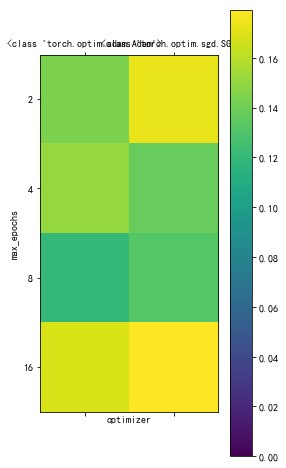

In [29]:
import matplotlib.pyplot as plt
plt.matshow(gs.cv_results_['mean_test_score'].reshape(-1, 2),
 vmin=0, cmap="viridis")
plt.xlabel("optimizer")
plt.ylabel("max_epochs")
plt.xticks(range(len(params['optimizer'])),
 params['optimizer'])
plt.yticks(range(len(params['max_epochs'])),
 params['max_epochs'])
plt.colorbar()

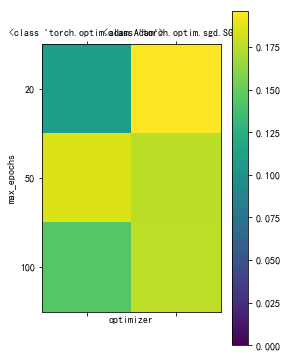

In [46]:
import matplotlib.pyplot as plt
plt.matshow(gs.cv_results_['mean_test_score'].reshape(-1, 2),
 vmin=0, cmap="viridis")
plt.xlabel("optimizer")
plt.ylabel("max_epochs")
plt.xticks(range(len(params['optimizer'])),
 params['optimizer'])
plt.yticks(range(len(params['max_epochs'])),
 params['max_epochs'])
plt.colorbar()